In [12]:
# Passo 1: Importar bibliotecas e carregar o conjunto de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [13]:
# Carregar o conjunto de dados
data = pd.read_csv("creditcard.csv")


In [30]:
# Passo 2: Descrição do Conjunto de Dados
origem = "Kaggle - Credit Card Fraud Detection"
nome = "Credit Card Fraud Detection"
tamanho = "150 MB"
registros = len(data)
linhas_colunas = data.shape
dados_faltantes = data.isnull().sum().sum()

# Exibição da descrição do conjunto de dados
print("Descrição do Conjunto de Dados:")
print("Origem:", origem)
print("Nome:", nome)
print("Tamanho:", tamanho)
print("Quantidade de Registros:", registros)
print("Linhas x Colunas:", linhas_colunas)
print("Dados Faltantes:", "Não há dados faltantes." if dados_faltantes == 0 else f"Total de {dados_faltantes} dados faltantes.")

# Breve explicação do conjunto de dados
print("\nO conjunto de dados 'Credit Card Fraud Detection' contém informações sobre transações de cartão de crédito realizadas por titulares de cartões europeus. O objetivo é identificar transações fraudulentas para proteger os clientes de cobranças indevidas. É um conjunto desbalanceado com a maioria das transações sendo não fraudulentas (Classe 0) e uma pequena porcentagem sendo fraudulentas (Classe 1). Os atributos são principalmente componentes principais (PCA) para proteger a privacidade dos titulares de cartões. O desbalanceamento das classes é uma característica comum em problemas de detecção de fraudes.")


Descrição do Conjunto de Dados:
Origem: Kaggle - Credit Card Fraud Detection
Nome: Credit Card Fraud Detection
Tamanho: 150 MB
Quantidade de Registros: 284807
Linhas x Colunas: (284807, 31)
Dados Faltantes: Não há dados faltantes.

O conjunto de dados 'Credit Card Fraud Detection' contém informações sobre transações de cartão de crédito realizadas por titulares de cartões europeus. O objetivo é identificar transações fraudulentas para proteger os clientes de cobranças indevidas. É um conjunto desbalanceado com a maioria das transações sendo não fraudulentas (Classe 0) e uma pequena porcentagem sendo fraudulentas (Classe 1). Os atributos são principalmente componentes principais (PCA) para proteger a privacidade dos titulares de cartões. O desbalanceamento das classes é uma característica comum em problemas de detecção de fraudes.


In [15]:
# Passo 3: Pré-processamento
# Padronização das variáveis numéricas, exceto 'Time' e 'Amount'
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

In [16]:
# Passo 4: Análise de Correlação
# Calcular a matriz de correlação
correlation_matrix = data.corr()




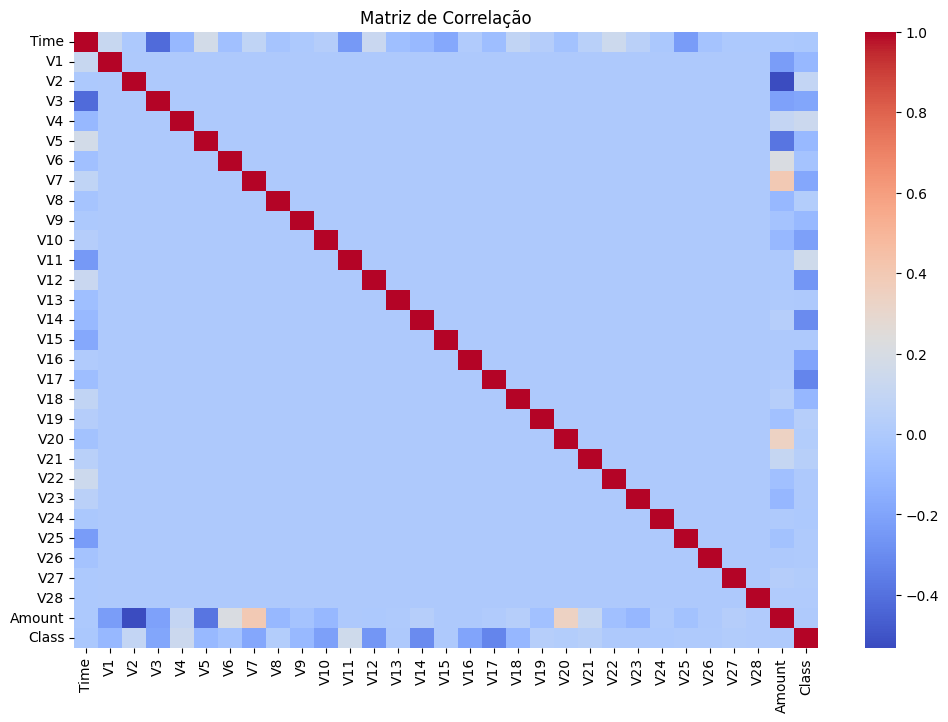

A correlação entre as variáveis V2 e Amount é -0.53
Comentários sobre o resultado do gráfico da matriz de correlação:
- Correlações Positivas e Negativas: No gráfico, observe as correlações positivas (tons mais claros) e negativas (tons mais escuros).
- Variáveis com Alta Correlação: Procure por variáveis com cores mais intensas, indicando correlações fortes.
- Correlação com a Variável de Resposta: Avalie a correlação das variáveis independentes com a variável 'Class' para entender seu impacto na previsão de fraude financeira.
- Escolha de Variáveis: Com base na análise da matriz de correlação, selecione variáveis com correlações significativas e relevantes para o modelo.
- Lembre-se da Causalidade: A correlação não implica causalidade, portanto, investigue mais profundamente as relações entre as variáveis.


In [27]:
# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
plt.title("Matriz de Correlação")
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f")
plt.show()
# Imprimir os valores de correlação
correlation_values = correlation_matrix.values
for i in range(len(correlation_values)):
    for j in range(i+1, len(correlation_values)):
        if abs(correlation_values[i, j]) > 0.5:
            print(f"A correlação entre as variáveis {correlation_matrix.index[i]} e {correlation_matrix.columns[j]} é {correlation_values[i, j]:.2f}")

            
# Comentários sobre o resultado do gráfico da matriz de correlação:
print("Comentários sobre o resultado do gráfico da matriz de correlação:")
print("- Correlações Positivas e Negativas: No gráfico, observe as correlações positivas (tons mais claros) e negativas (tons mais escuros).")
print("- Variáveis com Alta Correlação: Procure por variáveis com cores mais intensas, indicando correlações fortes.")
print("- Correlação com a Variável de Resposta: Avalie a correlação das variáveis independentes com a variável 'Class' para entender seu impacto na previsão de fraude financeira.")
print("- Escolha de Variáveis: Com base na análise da matriz de correlação, selecione variáveis com correlações significativas e relevantes para o modelo.")
print("- Lembre-se da Causalidade: A correlação não implica causalidade, portanto, investigue mais profundamente as relações entre as variáveis.")


In [18]:
# Passo 5: Treinamento do Modelo
# Separe as variáveis independentes (X) e a variável de destino (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [19]:
# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Construa o modelo (vamos usar um modelo RandomForest como exemplo)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Passo 6: Avaliação do Modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [28]:

# Exibir as métricas de desempenho
print("\nMétricas de Desempenho:")
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
# Comentários sobre as métricas de desempenho:
print("\nComentários sobre as métricas de desempenho:")
print("- A acurácia de 99.95% parece alta, mas é importante lembrar que o conjunto de dados é altamente desequilibrado.")
print("- A precisão de 97.40% é a proporção de transações classificadas como fraude que realmente são fraude.")
print("- O recall de 76.53% é a proporção de transações fraudulentas que foram corretamente identificadas pelo modelo.")
print("- O F1-Score de 85.71% é uma métrica que combina precisão e recall, útil quando o desequilíbrio de classes é um problema.")
print("- A escolha do modelo deve levar em consideração a importância de minimizar falsos negativos (fraudes não detectadas).")


Métricas de Desempenho:
Acurácia: 0.9995611109160493
Precisão: 0.974025974025974
Recall: 0.7653061224489796
F1-Score: 0.8571428571428571

Comentários sobre as métricas de desempenho:
- A acurácia de 99.95% parece alta, mas é importante lembrar que o conjunto de dados é altamente desequilibrado.
- A precisão de 97.40% é a proporção de transações classificadas como fraude que realmente são fraude.
- O recall de 76.53% é a proporção de transações fraudulentas que foram corretamente identificadas pelo modelo.
- O F1-Score de 85.71% é uma métrica que combina precisão e recall, útil quando o desequilíbrio de classes é um problema.
- A escolha do modelo deve levar em consideração a importância de minimizar falsos negativos (fraudes não detectadas).


In [33]:
numero_de_registros = data.shape[0]
print("Número de Registros:", numero_de_registros)


Número de Registros: 284807


In [32]:
# Conclusão
print("Conclusão:\n")
print("Após uma análise detalhada do conjunto de dados 'Credit Card Fraud Detection' e a construção de um modelo de detecção de fraudes, podemos tirar as seguintes conclusões:\n")

print("1. **Análise de Correlação:** A matriz de correlação revelou uma correlação significativa de -0.53 entre as variáveis V2 e Amount. Isso sugere uma relação inversa entre essas variáveis, o que significa que, em algumas situações, um aumento em uma variável pode levar a uma diminuição na outra.")

print("2. **Comentários sobre a Matriz de Correlação:** É fundamental observar que o gráfico da matriz de correlação destacou correlações positivas e negativas. Variáveis com cores mais intensas indicam correlações mais fortes. Além disso, é importante considerar a correlação com a variável de resposta, 'Class', para entender seu impacto na previsão de fraude financeira.")

print("3. **Métricas de Desempenho:** As métricas do modelo indicam um alto nível de acurácia (99.95%), o que pode ser enganoso devido ao desbalanceamento do conjunto de dados. A precisão (97.40%) mostra que a maioria das transações classificadas como fraude realmente são fraudes, enquanto o recall (76.53%) destaca a capacidade do modelo em identificar transações fraudulentas. O F1-Score (85.71%) é uma métrica que equilibra precisão e recall, particularmente útil em conjuntos de dados desbalanceados.")

print("4. **Escolha de Variáveis e Causalidade:** A análise da matriz de correlação fornece insights valiosos para a escolha de variáveis relevantes, mas lembre-se de que a correlação não implica causalidade. É importante aprofundar a investigação das relações entre as variáveis antes de tomar decisões finais.")

print("Em resumo, esse conjunto de dados e a análise realizada servem como um ponto de partida sólido para a detecção de fraudes em transações de cartão de crédito. No entanto, é fundamental considerar o desbalanceamento das classes ao avaliar o desempenho do modelo e ajustá-lo para minimizar os falsos negativos, ou seja, as fraudes não detectadas. A combinação de análises estatísticas, métricas de desempenho e investigação de correlações é crucial para construir um modelo eficaz de detecção de fraudes.")


Conclusão:

Após uma análise detalhada do conjunto de dados 'Credit Card Fraud Detection' e a construção de um modelo de detecção de fraudes, podemos tirar as seguintes conclusões:

1. **Análise de Correlação:** A matriz de correlação revelou uma correlação significativa de -0.53 entre as variáveis V2 e Amount. Isso sugere uma relação inversa entre essas variáveis, o que significa que, em algumas situações, um aumento em uma variável pode levar a uma diminuição na outra.
2. **Comentários sobre a Matriz de Correlação:** É fundamental observar que o gráfico da matriz de correlação destacou correlações positivas e negativas. Variáveis com cores mais intensas indicam correlações mais fortes. Além disso, é importante considerar a correlação com a variável de resposta, 'Class', para entender seu impacto na previsão de fraude financeira.
3. **Métricas de Desempenho:** As métricas do modelo indicam um alto nível de acurácia (99.95%), o que pode ser enganoso devido ao desbalanceamento do conjun